## Analysis of Titanic Data
Available [kaggle.com](https://www.kaggle.com/c/titanic/data)

In [191]:
import unicodecsv

with open('titanic_data.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    tdata = list(reader)
    
print tdata[0]

{u'Fare': u'7.25', u'Name': u'Braund, Mr. Owen Harris', u'Embarked': u'S', u'Age': u'22', u'Parch': u'0', u'Pclass': u'3', u'Sex': u'male', u'Survived': u'0', u'SibSp': u'1', u'PassengerId': u'1', u'Ticket': u'A/5 21171', u'Cabin': u''}


### Fix Data

In [192]:
def parse_ticket(ticket):
    '''Takes a ticket string and returns only the numerical value of the ticket number. The numerical value is always the last
    part of the string.'''
    if ticket == '':
        return None
    else:
        ticket_reverse_split = ticket[::-1].split(' ', 1)
        ticket_num = ticket_reverse_split[0][::-1]
    try:
        return int(ticket_num)
    except:
        return None
    
def parse_int(number):
    '''Returns number string as int. Returns "None" if empty'''
    if number == "":
        return None
    return int(number)
    
def parse_float(number):
    '''Returns number string as float. Returns "None" if empty'''
    if number == "":
        return None
    return float(number) 

def parse_string(string):
    '''Returns empty string value as "None"'''
    if string == "":
        return None
    return string

# Clean up data in titanic data table
for data in tdata:
    data['Survived'] = parse_int(data['Survived'])
    data['Pclass'] = parse_int(data['Pclass'])
    data['Age'] = parse_float(data['Age'])
    data['SibSp'] = parse_int(data['SibSp'])
    data['Parch'] = parse_int(data['Parch'])
    data['Ticket'] = parse_ticket(data['Ticket'])
    data['Fare'] = parse_float(data['Fare'])
    data['Cabin'] = parse_string(data['Cabin'])
    data['Embarked'] = parse_string(data['Embarked'])
    
print tdata[5]

{u'Fare': 8.4583, u'Name': u'Moran, Mr. James', u'Embarked': u'Q', u'Age': None, u'Parch': 0, u'Pclass': 3, u'Sex': u'male', u'Survived': 0, u'SibSp': 0, u'PassengerId': u'6', u'Ticket': 330877, u'Cabin': None}


### Questions:

Although many question *why* the titanic sank, the main question this dataset may help with is **what factors lead to a higher rate of survival for passengers onboard the titanic?**

Factors to inspect from this data set include:
* Class
* Sex
* Age
* Family Onboard
* Ticket #
* Fare



In [193]:
# Define function to generate lists
def list_maker(data, key, value):
    '''Returns dataset with desired key value'''
    data_true = []
    for element in data:
        item = []
        if element[key] == value:
            data_true.append(element)
    return data_true

# Generate survivor and not_survivor lists
survivors = list_maker(tdata, "Survived", 1)
not_survivors = list_maker(tdata, "Survived", 0)

In [194]:
# Inspect factor CLASS from key "Pclass"
    
# Find number of survivors based on class
num_surv_low = len(list_maker(survivors, "Pclass", 3))
num_surv_mid = len(list_maker(survivors, "Pclass", 2))
num_surv_up = len(list_maker(survivors, "Pclass", 1))

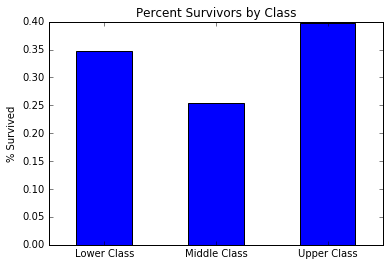

In [198]:
import matplotlib.pyplot as plt
%matplotlib inline

x_values = [1,2,3]
y_values = [num_surv_low/float(len(survivors)), num_surv_mid/float(len(survivors)), num_surv_up/float(len(survivors))]
labels = ["Lower Class", "Middle Class", "Upper Class"]

plt.bar(x_values, y_values, align='center', width=.5)
plt.xticks(x_values, labels)
plt.ylabel("% Survived")
plt.title("Percent Survivors by Class")

plt.show()